In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('dark_background')
import numpy as np
from tqdm import tqdm

# if torch.backends.mps.is_available():
#     torch.set_default_device("mps")

In [2]:
# Define the MLP architecture
class MLP_Moons(nn.Module):
    def __init__(self):
        super(MLP_Moons, self).__init__()
        self.ly1 = nn.Linear(2, 10)
        self.final = nn.Linear(10, 1)
        
        self.sig = nn.Sigmoid()
        
        
    def forward(self, x):
        out = self.ly1(x)
        out = self.sig(out)
        out = self.final(out)
        out = self.sig(out)
        return out

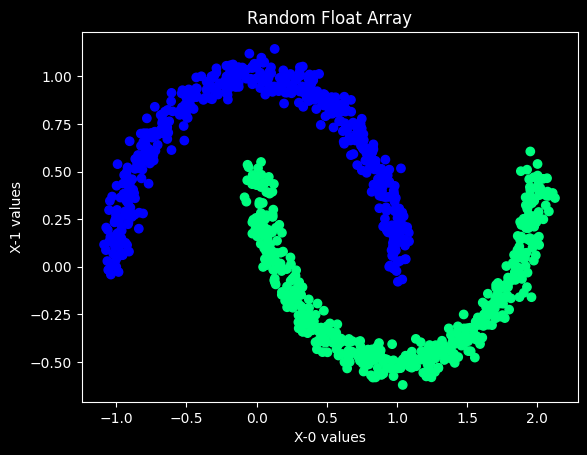

In [3]:
# Generate the circle dataset
X, y = make_moons(n_samples=1000, noise=.05)

"""
Plots two lists of random floating-point numbers as (x, y) coordinates using Matplotlib
"""
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap='winter')
plt.xlabel('X-0 values')
plt.ylabel('X-1 values')
plt.title('Random Float Array')
plt.show()

In [4]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_val_tensor = torch.from_numpy(X_val).float()
y_val_tensor = torch.from_numpy(y_val).float()

In [5]:
(X_train_tensor.shape[0], X_val_tensor.shape[0])

(900, 100)

In [6]:
# Create an instance of the MLP model
model = MLP_Moons()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.03)

In [7]:
model.eval()
y_pred = model(X_val_tensor)
before_train = criterion(y_pred.squeeze(), y_val_tensor)
print('Test loss before training' , before_train.item())

Test loss before training 0.2759919762611389


In [8]:
# Train the model
model.train()
epoch = 5000

for epoch in range(epoch):
    # Forward pass
    y_pred = model(X_train_tensor)
    # Compute Loss
    loss = criterion(y_pred.squeeze(), y_train_tensor)
   
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    
    # Zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.2668262720108032
Epoch 1: train loss: 0.2568318247795105
Epoch 2: train loss: 0.24946656823158264
Epoch 3: train loss: 0.2437373697757721
Epoch 4: train loss: 0.23897500336170197
Epoch 5: train loss: 0.2345857173204422
Epoch 6: train loss: 0.23012417554855347
Epoch 7: train loss: 0.2253672331571579
Epoch 8: train loss: 0.22027356922626495
Epoch 9: train loss: 0.2149118334054947
Epoch 10: train loss: 0.20939889550209045
Epoch 11: train loss: 0.20385004580020905
Epoch 12: train loss: 0.1983412802219391
Epoch 13: train loss: 0.1928880363702774
Epoch 14: train loss: 0.1874476671218872
Epoch 15: train loss: 0.18195125460624695
Epoch 16: train loss: 0.1763588935136795
Epoch 17: train loss: 0.1706990897655487
Epoch 18: train loss: 0.16506557166576385
Epoch 19: train loss: 0.15958522260189056
Epoch 20: train loss: 0.154380202293396
Epoch 21: train loss: 0.1495378166437149
Epoch 22: train loss: 0.14509569108486176
Epoch 23: train loss: 0.14104638993740082
Epoch 24: train 

In [9]:
model.eval()
y_pred = model(X_val_tensor)
after_train = criterion(y_pred.squeeze(), y_val_tensor)
print('Test loss after training' , after_train.item())

Test loss after training 4.2834253690671176e-06


# Visualize the *nn* model thinks

In [10]:
# Generate all possible values for each parameter
min_value = -1.5
max_value = 1.5
step_size = 0.01

X_t = []

for x1 in tqdm(np.arange(min_value, max_value + step_size, step_size)):
    for x2 in np.arange(min_value, max_value + step_size, step_size):
        X_t = X_t + [[x1, x2]]

X_t = np.array(X_t)
X_test = torch.from_numpy(X_t).float()
X_test

100%|██████████| 301/301 [00:11<00:00, 26.36it/s]


tensor([[-1.5000, -1.5000],
        [-1.5000, -1.4900],
        [-1.5000, -1.4800],
        ...,
        [ 1.5000,  1.4800],
        [ 1.5000,  1.4900],
        [ 1.5000,  1.5000]])

In [11]:
y = model(X_test)
y

tensor([[0.5651],
        [0.5361],
        [0.5071],
        ...,
        [0.0009],
        [0.0009],
        [0.0009]], grad_fn=<SigmoidBackward0>)

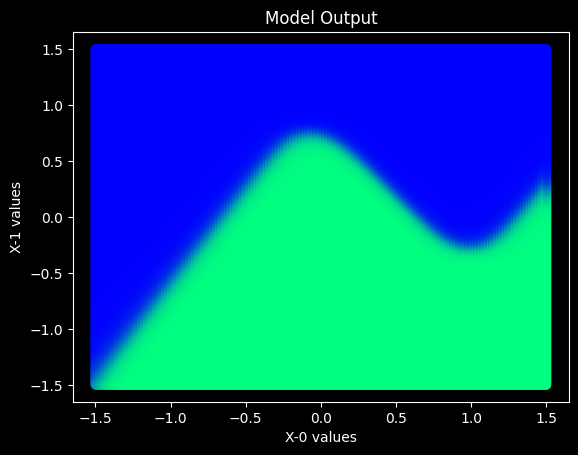

In [12]:
"""
Plots two lists of random floating-point numbers as (x, y) coordinates using Matplotlib
"""
plt.scatter(X_t[:, 0], X_t[:, 1], marker="o", c=y.detach().cpu().numpy(), cmap='winter')
plt.xlabel('X-0 values')
plt.ylabel('X-1 values')
plt.title('Model Output')
plt.show()